# Ames Housing Data Analysis and Prediction

In this notebook, we will analyze the Ames Housing dataset, preprocess the data, and build a Decision Tree Regressor model to predict house prices. We'll also implement functions for preprocessing and making predictions on new data.

## Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
houses = pd.read_csv("Ames_Housing_Data1.tsv" , sep = "\t")

## Exploration

In [3]:
houses.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
6,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
7,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
8,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
9,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


In [4]:
houses.shape # our data consists of 2931 row and 82 column

(2931, 82)

In [5]:
# Descriptive statistics for numerical columns
houses.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2931.000000,2.931000e+03,2931.000000,2441.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2908.000000,...,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000,2931.000000
mean,1465.000341,7.144003e+08,57.374616,69.253994,10155.298874,6.094848,5.562948,1971.352439,1984.258274,101.900275,...,93.791539,47.538383,23.003753,2.591607,15.996588,2.242579,50.617878,6.215626,2007.791198,180807.729785
std,846.250554,1.887306e+08,42.636341,23.405675,7888.789128,1.410786,1.111396,30.240926,20.861542,179.081899,...,126.358242,67.472412,64.129522,25.137086,56.078577,35.591130,566.248407,2.714122,1.317021,79875.557267
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,732.500000,5.284770e+08,20.000000,58.000000,7440.500000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.000000,5.354532e+08,50.000000,68.000000,9439.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.500000,9.071811e+08,70.000000,80.000000,11556.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [6]:
# Descriptive statistics for categorical columns
houses.describe(include=['object'])

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2931,2931,198,2931,2931,2931,2931,2931,2931,2931,...,2774,2772,2772,2772,2931,13,572,106,2931,2931
unique,7,2,2,4,4,3,5,3,28,9,...,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2274,2919,120,1859,2634,2928,2140,2790,444,2523,...,1732,1231,2616,2666,2652,4,330,95,2537,2414


In [7]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2931 non-null   int64  
 1   PID              2931 non-null   int64  
 2   MS SubClass      2931 non-null   int64  
 3   MS Zoning        2931 non-null   object 
 4   Lot Frontage     2441 non-null   float64
 5   Lot Area         2931 non-null   int64  
 6   Street           2931 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2931 non-null   object 
 9   Land Contour     2931 non-null   object 
 10  Utilities        2931 non-null   object 
 11  Lot Config       2931 non-null   object 
 12  Land Slope       2931 non-null   object 
 13  Neighborhood     2931 non-null   object 
 14  Condition 1      2931 non-null   object 
 15  Condition 2      2931 non-null   object 
 16  Bldg Type        2931 non-null   object 
 17  House Style   

# Preprocessing

## Check and handle the nulls

In [8]:
# if we notice the columns that have low number of non-values (most of its rows are nulls) so we decide to drop them 
# We will identify columns with null values and calculate the percentage of missing values for each column.
# If any column has more than 20% missing values, it will be dropped.

nulls_col=houses.isnull().sum().sort_values(ascending=False).head(30)
null_per = (nulls_col/len(houses))*100
null_per

Pool QC           99.556465
Misc Feature      96.383487
Alley             93.244626
Fence             80.484476
Mas Vnr Type      60.559536
Fireplace Qu      48.515865
Lot Frontage      16.717844
Garage Cond        5.424770
Garage Finish      5.424770
Garage Yr Blt      5.424770
Garage Qual        5.424770
Garage Type        5.356534
Bsmt Exposure      2.831798
BsmtFin Type 2     2.763562
Bsmt Qual          2.729444
Bsmt Cond          2.729444
BsmtFin Type 1     2.729444
Mas Vnr Area       0.784715
Bsmt Full Bath     0.068236
Bsmt Half Bath     0.068236
BsmtFin SF 1       0.034118
Garage Cars        0.034118
Electrical         0.034118
Total Bsmt SF      0.034118
Bsmt Unf SF        0.034118
BsmtFin SF 2       0.034118
Garage Area        0.034118
Paved Drive        0.000000
Full Bath          0.000000
Half Bath          0.000000
dtype: float64

<Axes: >

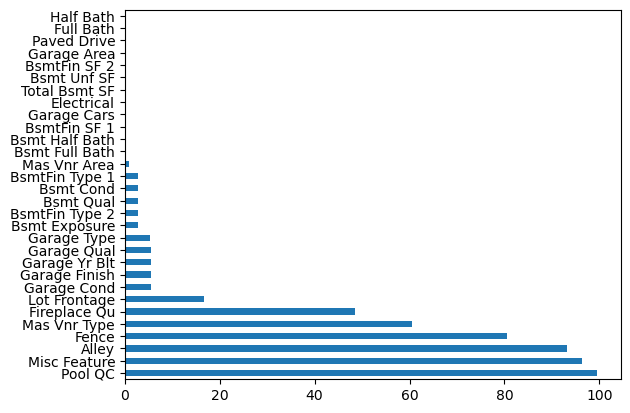

In [9]:
null_per.plot(kind="barh")

In [10]:
null_per[null_per>20].index

Index(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Mas Vnr Type',
       'Fireplace Qu'],
      dtype='object')

In [11]:
houses=houses.drop(null_per[null_per>20].index,axis=1)

shape of data after drop the high nulls columns is (2931, 76)


<Axes: >

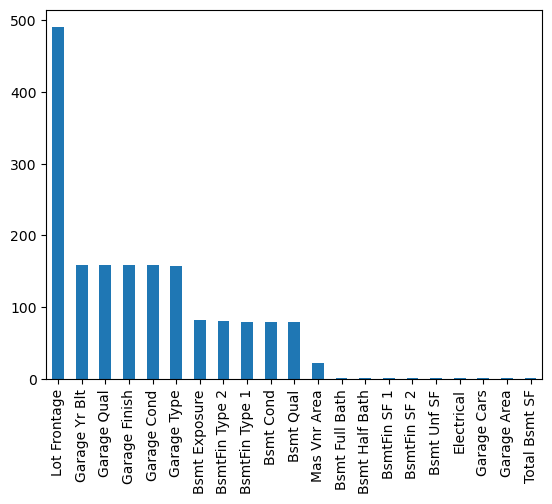

In [12]:
# check the shape
print("shape of data after drop the high nulls columns is" ,houses.shape)

nulls=houses.isnull().sum()
highnulls= nulls[nulls>0].sort_values(ascending=False)
precentage_nulls= (highnulls/houses.shape[0])*100
precentage_nulls.sort_values(ascending=False)
highnulls.plot(kind="bar")

### For the `Lot Frontage` column, we will fill missing values with the mean becuase it has high num of null rowa. but We will also drop remaining rows with missing values.

In [13]:
houses["Lot Frontage"].mean()

69.25399426464564

In [14]:
houses["Lot Frontage"].fillna(houses["Lot Frontage"].mean(),inplace=True)

In [15]:
houses.dropna(axis=0,inplace=True)
houses.isnull().sum().sum()

0

## Remove Duplicates
we will work on PID column, The PID column typically stands for "Patient ID," "Product ID," "Process ID," or any identifier that uniquely identifies an entity in your dataset.

In [16]:
dupl = houses[houses.duplicated(subset = "PID")]
dupl

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,5,2010,WD,Normal,215000


In [17]:
houses = houses.drop_duplicates(subset = "PID")
houses.duplicated(subset = "PID").sum()

0

In [18]:
# current shape of data
houses.shape

(2678, 76)

## Feature Selection

We will compute the correlation of numeric features with the target variable `SalePrice` and drop uncorrelated features based on a threshold.

In [19]:
numeric = houses.select_dtypes(include = ["int64" , "float64"])
numeric

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,1,526301100,20,141.000000,31770,6,5,1960,1960,112.0,...,210,62,0,0,0,0,0,5,2010,215000
2,2,526350040,20,80.000000,11622,5,6,1961,1961,0.0,...,140,0,0,0,120,0,0,6,2010,105000
3,3,526351010,20,81.000000,14267,6,6,1958,1958,108.0,...,393,36,0,0,0,0,12500,6,2010,172000
4,4,526353030,20,93.000000,11160,7,5,1968,1968,0.0,...,0,0,0,0,0,0,0,4,2010,244000
5,5,527105010,60,74.000000,13830,5,5,1997,1998,0.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2925,923251180,20,160.000000,20000,5,7,1960,1996,0.0,...,474,0,0,0,0,0,0,9,2006,131000
2926,2926,923275080,80,37.000000,7937,6,6,1984,1984,0.0,...,120,0,0,0,0,0,0,3,2006,142500
2927,2927,923276100,20,69.253994,8885,5,5,1983,1983,0.0,...,164,0,0,0,0,0,0,6,2006,131000
2929,2929,924100070,20,77.000000,10010,5,5,1974,1975,0.0,...,240,38,0,0,0,0,0,4,2006,170000


In [20]:
# notice that the target column in our model is SalePrice
num_corr = numeric.corr()["SalePrice"].sort_values(ascending = False)
num_corr

SalePrice          1.000000
Overall Qual       0.793249
Gr Liv Area        0.715867
Garage Cars        0.652448
Garage Area        0.633467
1st Flr SF         0.630424
Total Bsmt SF      0.630305
Full Bath          0.555861
Year Built         0.545724
Garage Yr Blt      0.526832
Year Remod/Add     0.525889
TotRms AbvGrd      0.523363
Mas Vnr Area       0.499652
Fireplaces         0.452517
BsmtFin SF 1       0.412925
Lot Frontage       0.346408
Open Porch SF      0.317461
Wood Deck SF       0.309485
Half Bath          0.269085
2nd Flr SF         0.265038
Bsmt Full Bath     0.263045
Lot Area           0.261842
Bsmt Unf SF        0.162408
Bedroom AbvGr      0.149441
Screen Porch       0.105232
Pool Area          0.074451
Mo Sold            0.031479
3Ssn Porch         0.030700
BsmtFin SF 2      -0.013117
Misc Val          -0.014644
Yr Sold           -0.025398
Low Qual Fin SF   -0.028493
Order             -0.031744
Bsmt Half Bath    -0.046883
MS SubClass       -0.073121
Kitchen AbvGr     -0

In [21]:
# correlated columns to SalePrice
corr_data = num_corr[abs(num_corr) > 0.5].sort_values(ascending = False)
corr_data

SalePrice         1.000000
Overall Qual      0.793249
Gr Liv Area       0.715867
Garage Cars       0.652448
Garage Area       0.633467
1st Flr SF        0.630424
Total Bsmt SF     0.630305
Full Bath         0.555861
Year Built        0.545724
Garage Yr Blt     0.526832
Year Remod/Add    0.525889
TotRms AbvGrd     0.523363
Name: SalePrice, dtype: float64

In [22]:
# uncorrelated columns to SalePrice
uncorr_data = num_corr[abs(num_corr) < 0.5].sort_values(ascending = False).index
uncorr_data

Index(['Mas Vnr Area', 'Fireplaces', 'BsmtFin SF 1', 'Lot Frontage',
       'Open Porch SF', 'Wood Deck SF', 'Half Bath', '2nd Flr SF',
       'Bsmt Full Bath', 'Lot Area', 'Bsmt Unf SF', 'Bedroom AbvGr',
       'Screen Porch', 'Pool Area', 'Mo Sold', '3Ssn Porch', 'BsmtFin SF 2',
       'Misc Val', 'Yr Sold', 'Low Qual Fin SF', 'Order', 'Bsmt Half Bath',
       'MS SubClass', 'Kitchen AbvGr', 'Enclosed Porch', 'Overall Cond',
       'PID'],
      dtype='object')

In [23]:
# we will drop uncorelated features to our target , and focus on the corr columns
houses = houses.drop(uncorr_data , axis = 1)
houses.shape

(2678, 49)

In [24]:
corr_data.index

Index(['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Cars',
       'Garage Area', '1st Flr SF', 'Total Bsmt SF', 'Full Bath', 'Year Built',
       'Garage Yr Blt', 'Year Remod/Add', 'TotRms AbvGrd'],
      dtype='object')

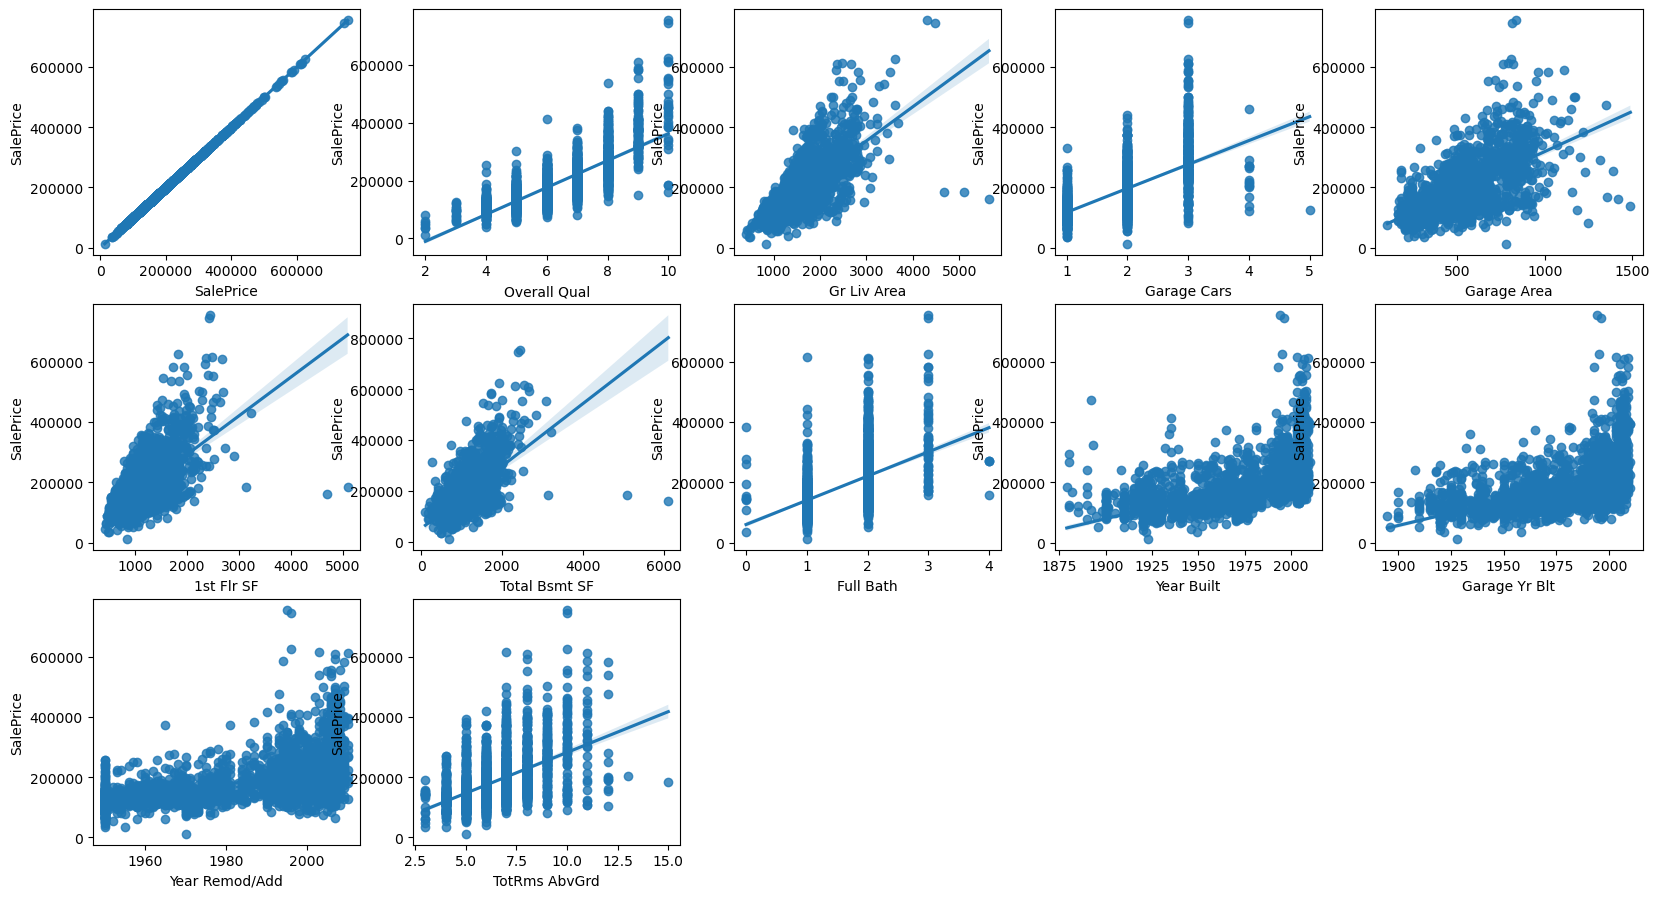

In [25]:
plt.figure(figsize=(20, 30))  

# Looping through all numerical columns
for i in range(len(corr_data.index)):
    plt.subplot(8, 5, i+1)  # Create a grid of subplots (8x5)
    sns.regplot(data=houses,x=corr_data.index[i], y="SalePrice")
    plt.xlabel(corr_data.index[i]) 
    plt.ylabel('SalePrice')

plt.show()

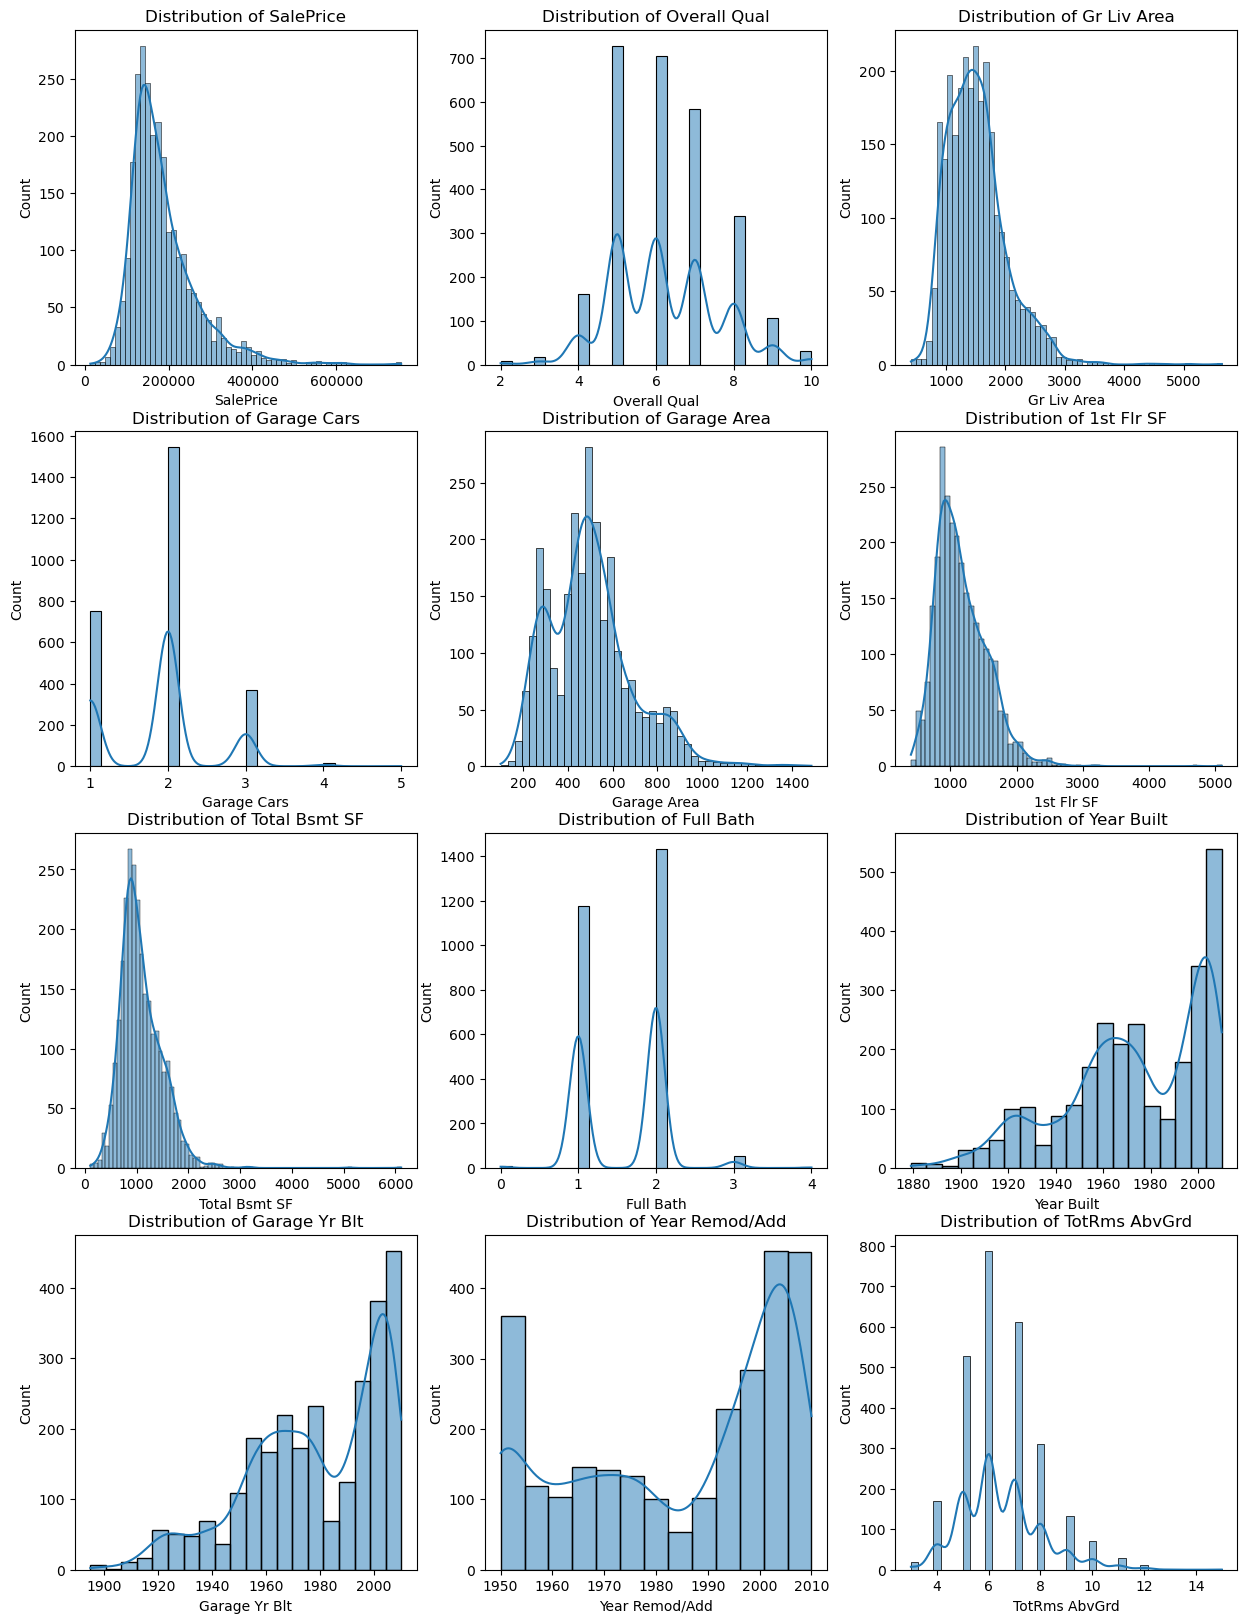

In [26]:
columns=corr_data.index
# Set up the figure size for multiple subplots
plt.figure(figsize=(15, 20))

for i, col in enumerate(columns, 1):
    plt.subplot(4, 3, i)  
    sns.histplot(houses[col], kde=True)  
    plt.title(f'Distribution of {col}')  


plt.show()

In [27]:
houses.head() # if you notice , now our data has 49 columns after drop uncorr columns

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition,SalePrice
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,1960.0,Fin,2.0,528.0,TA,TA,P,WD,Normal,215000
2,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,1961.0,Unf,1.0,730.0,TA,TA,Y,WD,Normal,105000
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,1958.0,Unf,1.0,312.0,TA,TA,Y,WD,Normal,172000
4,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,1968.0,Fin,2.0,522.0,TA,TA,Y,WD,Normal,244000
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,1997.0,Fin,2.0,482.0,TA,TA,Y,WD,Normal,189900


### Decision Trees are generally not sensitive to skewness and normalization of the data , so we will focus on handling categorical columns

## Categorical Encoding 

We will identify categorical columns and apply One-Hot Encoding to transform them into a suitable format for modeling.using One Hot Encoding

In [28]:
catg_col=houses.drop(corr_data.index,axis=1).columns
catg_col

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [29]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore') 

# Fit and transform the data
features_cat = encoder.fit_transform(houses[catg_col])
features_cat

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [30]:
# get the encoded categorical columns names from the encoding array
encoder.get_feature_names_out(catg_col)

array(['MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)',
       'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM', 'Street_Grvl',
       'Street_Pave', 'Lot Shape_IR1', 'Lot Shape_IR2', 'Lot Shape_IR3',
       'Lot Shape_Reg', 'Land Contour_Bnk', 'Land Contour_HLS',
       'Land Contour_Low', 'Land Contour_Lvl', 'Utilities_AllPub',
       'Utilities_NoSeWa', 'Utilities_NoSewr', 'Lot Config_Corner',
       'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3',
       'Lot Config_Inside', 'Land Slope_Gtl', 'Land Slope_Mod',
       'Land Slope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_GrnHill', 'Neighborhood_IDOTRR',
       'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Nei

In [31]:
# convert it to dataframe becuase we will reshape our dataset to be consists of encoded categorical columns and numric correlated columns
encoded_features_df = pd.DataFrame(features_cat, columns=encoder.get_feature_names_out(catg_col),index=houses.index)
encoded_features_df

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2926,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2927,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2929,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
houses_coded = pd.concat([houses[corr_data.index], encoded_features_df], axis=1) # they have same num of rows so we will concatenate dataframes with the columns 
houses_coded

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,1st Flr SF,Total Bsmt SF,Full Bath,Year Built,Garage Yr Blt,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,215000,6,1656,2.0,528.0,1656,1080.0,1,1960,1960.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,105000,5,896,1.0,730.0,896,882.0,1,1961,1961.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,172000,6,1329,1.0,312.0,1329,1329.0,1,1958,1958.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,244000,7,2110,2.0,522.0,2110,2110.0,2,1968,1968.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,189900,5,1629,2.0,482.0,928,928.0,2,1997,1997.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,131000,5,1224,2.0,576.0,1224,1224.0,1,1960,1960.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2926,142500,6,1003,2.0,588.0,1003,1003.0,1,1984,1984.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2927,131000,5,902,2.0,484.0,902,864.0,1,1983,1983.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2929,170000,5,1389,2.0,418.0,1389,1389.0,1,1974,1975.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
houses_coded

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,1st Flr SF,Total Bsmt SF,Full Bath,Year Built,Garage Yr Blt,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,215000,6,1656,2.0,528.0,1656,1080.0,1,1960,1960.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,105000,5,896,1.0,730.0,896,882.0,1,1961,1961.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,172000,6,1329,1.0,312.0,1329,1329.0,1,1958,1958.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,244000,7,2110,2.0,522.0,2110,2110.0,2,1968,1968.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,189900,5,1629,2.0,482.0,928,928.0,2,1997,1997.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,131000,5,1224,2.0,576.0,1224,1224.0,1,1960,1960.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2926,142500,6,1003,2.0,588.0,1003,1003.0,1,1984,1984.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2927,131000,5,902,2.0,484.0,902,864.0,1,1983,1983.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2929,170000,5,1389,2.0,418.0,1389,1389.0,1,1974,1975.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Prepare Data for Modeling

We will separate the target variable `SalePrice` from the features and split the data into training and testing sets.

In [34]:
# Descriptive statistics for our target column "SalePrice"

import numpy as np

price_column = houses["SalePrice"]

minimum_price = np.min(price_column)
maximum_price = np.max(price_column)
mean_price = np.mean(price_column)
median_price = np.median(price_column)
std_price = np.std(price_column)

# Print the statistics in a combined format
print("Statistics for Ames housing dataset:\n"
      "Minimum price: ${}\n"
      "Maximum price: ${}\n"
      "Mean price: ${}\n"
      "Median price: ${}\n"
      "Standard deviation of prices: ${}".format(
          minimum_price, maximum_price, mean_price, median_price, std_price))


Statistics for Ames housing dataset:
Minimum price: $12789
Maximum price: $755000
Mean price: $186405.72628827483
Median price: $166650.0
Standard deviation of prices: $79486.72345339888


In [35]:
# splite data to features and target
y = houses_coded["SalePrice"]
x = houses_coded.drop(["SalePrice"] , axis = 1) # x refer to features

In [36]:
x

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,1st Flr SF,Total Bsmt SF,Full Bath,Year Built,Garage Yr Blt,Year Remod/Add,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,6,1656,2.0,528.0,1656,1080.0,1,1960,1960.0,1960,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5,896,1.0,730.0,896,882.0,1,1961,1961.0,1961,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6,1329,1.0,312.0,1329,1329.0,1,1958,1958.0,1958,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,7,2110,2.0,522.0,2110,2110.0,2,1968,1968.0,1968,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,5,1629,2.0,482.0,928,928.0,2,1997,1997.0,1998,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,5,1224,2.0,576.0,1224,1224.0,1,1960,1960.0,1996,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2926,6,1003,2.0,588.0,1003,1003.0,1,1984,1984.0,1984,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2927,5,902,2.0,484.0,902,864.0,1,1983,1983.0,1983,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2929,5,1389,2.0,418.0,1389,1389.0,1,1974,1975.0,1975,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
# train test split before modeling
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=0)

## Model Training

We will define a function to fit a Decision Tree Regressor with hyperparameter tuning using GridSearchCV.

In [38]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score


def fit_model(X , y):
    
    cv_sets = ShuffleSplit(n_splits = 5 , random_state = 0 , test_size = 0.2 , train_size = None)
    
    regressor = DecisionTreeRegressor(random_state=0)

    # after tunning , we get this is the best range of the hyperparamters to get the highest accuracy 
    params = {"max_depth" : [2,4,6,8,10,12,14,16] , 'min_samples_leaf':[0,10,12,14,16],'min_samples_split':[2,4,6,8,10,12,14,16]}

    scoring = make_scorer(r2_score)
    
    grid = GridSearchCV(estimator=regressor, param_grid= params, scoring=scoring,cv=cv_sets)
    
    grid = grid.fit(X, y)
    
    return grid.best_estimator_

In [39]:
reg = fit_model(x_train , y_train) # reg now is the best regressor after tunning parameters by GridSearch

In [40]:
reg.fit(x_train, y_train) # fit the best regressor on the whole trainig data without cut the Cross validation part 

DecisionTreeRegressor(max_depth=8, min_samples_leaf=10, random_state=0)

In [41]:
best_params=reg.get_params()

# Print the best max_depth, min_samples_leaf, and min_samples_split
print(f"Best max_depth: {best_params['max_depth']}")
print(f"Best min_samples_leaf: {best_params['min_samples_leaf']}")
print(f"Best min_samples_split: {best_params['min_samples_split']}")

Best max_depth: 8
Best min_samples_leaf: 10
Best min_samples_split: 2


In [42]:
train_predict = reg.predict(x_train)
test_predict = reg.predict(x_test)

train_score = r2_score(y_train , train_predict)
test_score = r2_score(y_test , test_predict)

print("The Train Score Is : " , train_score)
print("The Test Score Is : " , test_score)

The Train Score Is :  0.8816950028450316
The Test Score Is :  0.8607482213653926


## Predictions and Output 
first we will work on preprocessd row of x (features) , so we take the row of index 4 (its Sale Price =244000)

We will demonstrate how to make predictions using the trained model and explore the predicted values.

In [43]:
x.loc[[8],:]

,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,1st Flr SF,Total Bsmt SF,Full Bath,Year Built,Garage Yr Blt,Year Remod/Add,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
8,8,1280,2.0,506.0,1280,1280.0,2,1992,1992.0,1992,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
# Predicted output
predicted_value = reg.predict(x.loc[[4], :])[0]  # Extract the scalar value from the array
actual_value = y.loc[4]  # Assuming y holds the actual values

# Display the result in a professional format
print(f"Predicted Value: {predicted_value:.2f}")
print(f"Actual Value: {actual_value:.2f}")
print(f"Difference: {predicted_value - actual_value:.2f}")

Predicted Value: 250370.00
Actual Value: 244000.00
Difference: 6370.00


## what if you need to input unpreprocessed row from the original dataset?
### Create Prediction Function

We will define a function that ensures the input data goes through the same transformations as the training data before being used for prediction.

In [45]:
import pandas as pd

# Global variables for training-based data handling
Lot_Frontage_mean = 69.22459016393442  # Example value for Lot Frontage mean
null_per = null_per  # Percent of missing values per column
uncorr_data = uncorr_data  # Uncorrelated columns to be removed
catg_col = catg_col  # Categorical columns to encode
encod = encoder  # Pre-fitted OneHotEncoder from training

def preprocess_row_and_predict(row_index, houses_df, model, encoder, x_train):
    """
    Preprocess a single row from the dataset and predict the target value using the trained model.
    
    Parameters:
    row_index (int): Index of the row in the dataset to be used for prediction.
    houses_df (pd.DataFrame): Original dataset before preprocessing.
    model (sklearn model): Pre-trained regression model.
    encoder (OneHotEncoder): Fitted encoder used to encode categorical features.
    x_train (pd.DataFrame): Training data (used to match feature order and columns).
    
    Returns:
    float: Predicted target value for the specified row.
    """
    # Step 1: Select the row for processing
    feature = houses_df.loc[[row_index], :]

    # Step 2: Remove duplications
    feature = feature.drop_duplicates()

    # Step 3: Handle missing values
    feature = feature.drop(null_per[null_per > 20].index, axis=1)
    feature["Lot Frontage"].fillna(Lot_Frontage_mean, inplace=True)
    feature = feature.dropna(axis=0)

    # Step 4: Remove uncorrelated columns
    feature = feature.drop(uncorr_data, axis=1)

    # Step 5: Encode categorical features
    existing_cols = [col for col in catg_col if col in feature.columns]
    if existing_cols:
        feature_coded = encoder.transform(feature[existing_cols])
        encoded_features_df = pd.DataFrame(feature_coded, columns=encoder.get_feature_names_out(existing_cols), index=feature.index)
        feature = feature.drop(existing_cols, axis=1)
        feature = pd.concat([feature, encoded_features_df], axis=1)

    # Step 6: Remove target column if present
    if 'SalePrice' in feature.columns:
        feature = feature.drop('SalePrice', axis=1)

    # Step 7: Reindex to ensure the same columns and order as training data
    feature = feature.reindex(columns=x_train.columns, fill_value=0)

    # Step 8: Make prediction using the pre-trained model
    output = model.predict(feature)

    # Return the predicted value
    return output[0]  # Return the prediction for the row


## Examples usage

In [46]:
houses2 = pd.read_csv("Ames_Housing_Data1.tsv", sep="\t")
houses2.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
6,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
7,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
8,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
9,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500


In [47]:
# Example usage for row index of 4:

# use already defined and fitted 'reg', 'encoder', and 'x_train'
row_index = 4  # for ex , this is Row index you want to use for prediction
predicted_value = preprocess_row_and_predict(row_index, houses2, reg, encoder, x_train)

print(f"Predicted SalePrice for row {row_index}: {predicted_value}")

actual_value = y.loc[row_index]
print(f"Actual SalePrice for row {row_index}: {actual_value:.2f}")

Predicted SalePrice for row 4: 250370.0
Actual SalePrice for row 4: 244000.00


In [48]:
# Example usage for row index of 8:

# use already defined and fitted 'reg', 'encoder', and 'x_train'
row_index = 2  # for ex , this is Row index you want to use for prediction
predicted_value = preprocess_row_and_predict(row_index, houses2, reg, encoder, x_train)

print(f"Predicted SalePrice for row {row_index}: {predicted_value}")

actual_value = y.loc[row_index]
print(f"Actual SalePrice for row {row_index}: {actual_value:.2f}")

Predicted SalePrice for row 2: 114039.28571428571
Actual SalePrice for row 2: 105000.00


## Conclusion

In this notebook, we explored the Ames Housing dataset, handled missing values, performed feature selection, and built a Decision Tree Regressor model for price prediction. Additionally, we created a function to preprocess new data and make predictions. The results can be further analyzed or compared with other models.